# NBA Players Analysis - Body Height

### Introduction

Basketball is one of the most popular sports in the world with about 650 million fans around the world [1]. One of the attributes that allow players to dominate basketball games is body height. A basketball hoop is 305 cm, hence the best way to increase your field goal chance is by being tall enough. In the 2021-2022 NBA season, the average height of basketball players was 198.6 cm, about 20 cm taller than the average American male [2].

However, some shorter players can also dominate NBA games:
- Allen Iverson 183 cm (1x NBA MVP x1, 11x All-Star, 4x Scoring Champ)
- Steve Nash 191 cm (2x NBA MVP, 8x All-Star, 5x NBA assists leader)
- Chris Paul 183 cm (12x All-Star, 11x NBA All Team, 9x NBA All-Defensive Team, 5x NBA Assists leader)
- And many more (Stephen Curry, Tony Parker, Kyrie Irving, etc.)

Based on that findings, the author want to analyze whether body height is the main factor for someone to dominate the game, or at least survive as a professional basketball player.


### Research Question

There are three main questions to be answered:
1. How is the height trend in NBA?
2. What is the correlation of height with players' performance?
    - points per game
    - rebounds per game
    - assists per game
    - Net rating
3. How are the height and weight of NBA top performers?
    - Based on points, rebounds, and assist

### Dataset

The data consist of 12305 rows representing players with their attributes and performance records. Since the focuses are height and performance, only relevant attributes will be chosen.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [26]:
df = pd.read_csv('all_seasons.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

In [28]:
relevant=['player_name','season','age','player_height','player_weight','gp','pts','reb','ast','net_rating']
df1=df[relevant]
df1.head()

,player_name,season,age,player_height,player_weight,gp,pts,reb,ast,net_rating
0,Dennis Rodman,1996-97,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1
1,Dwayne Schintzius,1996-97,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3
2,Earl Cureton,1996-97,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1
3,Ed O'Bannon,1996-97,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7
4,Ed Pinckney,1996-97,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2


- **player_name**: Name of the player
- **season**: Indicates the year when the player is playing
- **player_height**: Height of the player (in centimeters)
- **player_weight**: Weight of the player (in kilograms)
- **gp**: games played throughout the season
- **pts**: Average number of points scored in a season
- **reb**: Average number of rebounds grabbed in a season
- **ast**: Average number of assists distributed in a season
- **net_rating**: Team's point differential per 100 possessions while the player is on the court

### Analysis 1 - Height Trend in NBA

The objective of Analysis 1 is to find the height trend of every season in the NBA. In the modern-day NBA, 3 point shot becomes more common [3]. The main hypothesis is that the height of current NBA players is shorter than before. Three-point shots does not need a taller body, instead, shooting form and a lot of practice is the primary key [4].

#### Data Preparation

##### Change season format
The season attribute are in 2 year format with strings data type. Author will change it into 1 year format and integer data type to ease the analysis.

In [29]:
year=[]
for i, col in df1.iterrows():
    result=int(col['season'].split('-')[0])
    year.append(result)
df1['season_new']=year
df1.head()

C:\Users\Faiz\AppData\Local\Temp\ipykernel_31084\1936169825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['season_new']=year


,player_name,season,age,player_height,player_weight,gp,pts,reb,ast,net_rating,season_new
0,Dennis Rodman,1996-97,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,1996
1,Dwayne Schintzius,1996-97,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,1996
2,Earl Cureton,1996-97,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,1996
3,Ed O'Bannon,1996-97,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,1996
4,Ed Pinckney,1996-97,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,1996


Then, find the mean, median, min, and max player height in every season. mean and median are used to understand the average height while min and max are used to know the outlier in every season.

In [30]:
height_analysis=df1.groupby('season_new').agg({'player_height':['mean','median','min','max']})
height_reset=height_analysis.reset_index()
height_reset.columns=['season','mean','median','min','max']
height_reset

,season,mean,median,min,max
0,1996,200.994830,203.20,160.02,231.14
1,1997,200.619499,200.66,160.02,228.60
2,1998,200.903007,203.20,160.02,231.14
3,1999,200.920959,203.20,160.02,231.14
4,2000,200.752154,203.20,160.02,228.60
5,2001,201.017909,203.20,165.10,228.60
6,2002,201.520514,203.20,165.10,228.60
7,2003,201.315113,203.20,165.10,228.60
8,2004,201.245733,203.20,165.10,228.60
9,2005,200.920655,203.20,165.10,228.60


#### Analysis

In [31]:
text = '''
The average 
height has 
decreased 
in the last
3 years
'''

text_2='''
Highest height 
    average
'''


year_2019=round(height_reset['mean'][height_reset['season']==2019].values[0],2)
year_2020=round(height_reset['mean'][height_reset['season']==2020].values[0],2)
year_2021=round(height_reset['mean'][height_reset['season']==2021].values[0],2)
year_2002=round(height_reset['mean'][height_reset['season']==2002].values[0],2)

In [32]:
height_reset1=height_reset[height_reset['season']<2019]
height_reset2=height_reset[height_reset['season']>2018]

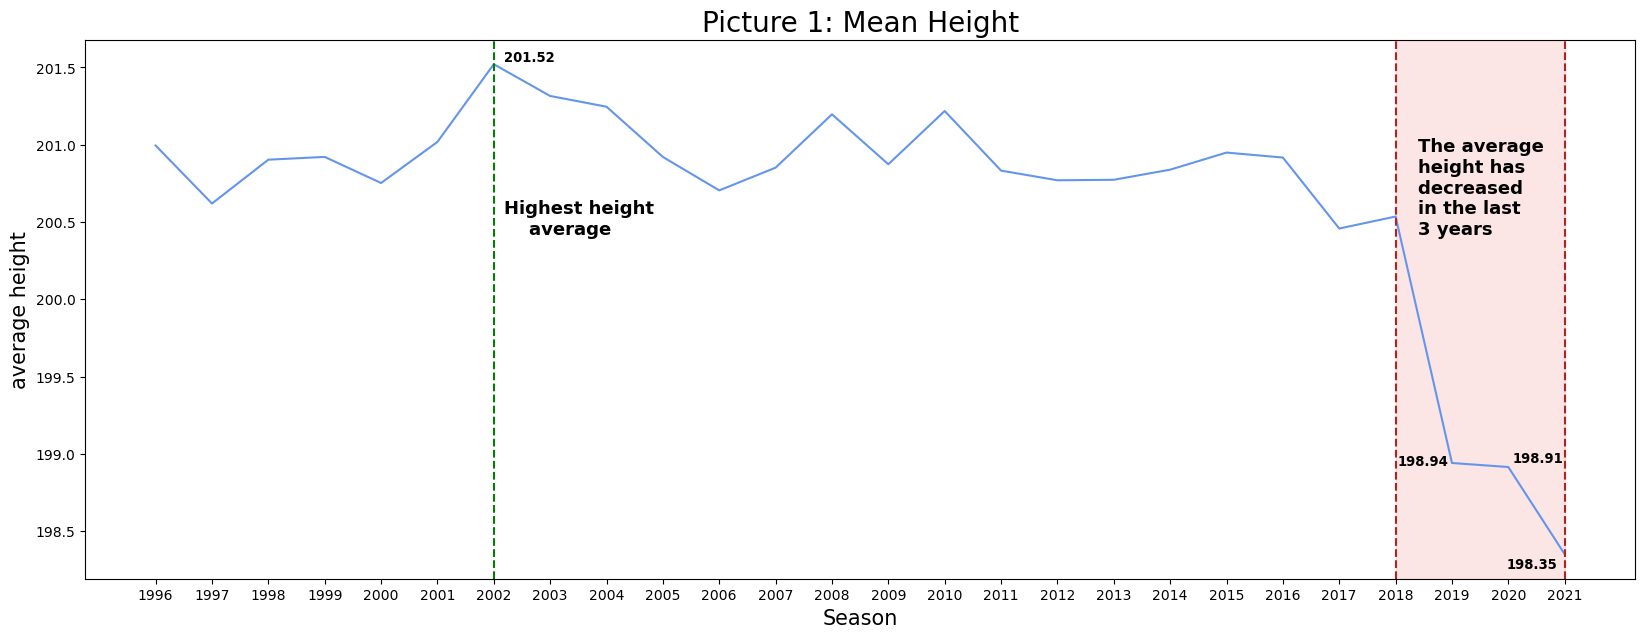

In [33]:
mean=height_reset['mean']
median=height_reset['median']
season=height_reset['season']
fig,ax=plt.subplots(1,1,figsize=(20,7))
plt.plot(season,mean,color='cornflowerblue')
plt.title('Picture 1: Mean Height',fontsize=20)
plt.xticks(range(1996,2022,1))
plt.axvline(2018, color='firebrick', linestyle='--', ymin=0, ymax=1)
plt.axvline(2021, color='firebrick', linestyle='--', ymin=0, ymax=1)
plt.axvline(2002, color='green', linestyle='--', ymin=0, ymax=1)
plt.text(0.86,0.6,text,transform=ax.transAxes,fontsize=13,fontweight='bold')
plt.text(0.27,0.6,text_2,transform=ax.transAxes,fontsize=13,fontweight='bold')
plt.text(0.847,0.21,year_2019,transform=ax.transAxes,fontsize=9.5,fontweight='bold')
plt.text(0.921,0.215,year_2020,transform=ax.transAxes,fontsize=9.5,fontweight='bold')
plt.text(0.917,0.02,year_2021,transform=ax.transAxes,fontsize=9.5,fontweight='bold')
plt.text(0.27,0.96,year_2002,transform=ax.transAxes,fontsize=9.5,fontweight='bold')
plt.axvspan(2018,2021,color='lightcoral',alpha=0.2)
plt.xlabel('Season',fontsize=15)
plt.ylabel('average height',fontsize=15);

In [34]:
df1[df1['player_height']<166]

,player_name,season,age,player_height,player_weight,gp,pts,reb,ast,net_rating,season_new
401,Muggsy Bogues,1996-97,32.0,160.02,63.956472,65,8.0,2.2,7.2,6.0,1996
484,Muggsy Bogues,1997-98,33.0,160.02,63.956472,61,5.7,2.2,5.4,-8.4,1997
1125,Muggsy Bogues,1998-99,34.0,160.02,63.956472,36,5.1,2.0,3.7,-2.1,1998
1250,Earl Boykins,1998-99,23.0,165.10,65.770840,22,3.0,0.8,1.5,-10.8,1998
1325,Earl Boykins,1999-00,24.0,165.10,60.327736,26,5.3,1.0,1.8,-11.8,1999
1727,Muggsy Bogues,1999-00,35.0,160.02,63.956472,80,5.1,1.7,3.7,0.4,1999
1773,Earl Boykins,2000-01,25.0,165.10,60.327736,10,6.5,1.1,3.2,-6.4,2000
2090,Muggsy Bogues,2000-01,36.0,160.02,61.688512,3,0.0,1.0,1.7,-27.4,2000
2589,Earl Boykins,2001-02,26.0,165.10,60.327736,68,4.1,0.8,2.1,-0.5,2001
2849,Earl Boykins,2002-03,27.0,165.10,60.327736,68,8.8,1.3,3.3,3.1,2002


#### Conclusion

In picture 1, it can be seen that from 1996 - 2018, the average height is consistently above 200 cm, and the highest was in 2002 with 201.5 cm. Then, in the 2019 - 2022 season, the average is down to about 198 cm.
Although the average height is lower in the past 3 years, the extreme outlier was found before the 2018 season instead with a height of 160 cm (Muggsy Bogues) and 165 cm (Earl Boykins).

### Analysis 2 - Height Correlation with Performance

The objective of Analysis 2 is to understand the impact of player height on performances. This is the further analysis from analysis 1 about the height. The main hypothesis is height does not have strong correlations with each major attribute: points, rebounds, assists, and net rating.

#### Data Preparation

##### Remove games played less than 58
Based on NBA regulation, a player needs at least 58 games in a season to be eligible for performance calculation (**pts, reb, ast, and net_rating**).

In [35]:
filtered=df1['gp']>57
df2=df1[filtered]

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6136 entries, 3 to 12302
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_name    6136 non-null   object 
 1   season         6136 non-null   object 
 2   age            6136 non-null   float64
 3   player_height  6136 non-null   float64
 4   player_weight  6136 non-null   float64
 5   gp             6136 non-null   int64  
 6   pts            6136 non-null   float64
 7   reb            6136 non-null   float64
 8   ast            6136 non-null   float64
 9   net_rating     6136 non-null   float64
 10  season_new     6136 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 575.2+ KB


##### Make sure all of the performance number is make sense

In [37]:
df2.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,season_new
count,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000
mean,27.228977,200.564501,100.436860,72.457464,10.966737,4.552559,2.411978,0.240385,2008.711701
std,4.215222,9.038281,12.286276,7.474716,5.757861,2.490576,1.941654,5.725821,7.218885
min,18.000000,160.020000,60.327736,58.000000,0.900000,0.400000,0.100000,-19.600000,1996.000000
25%,24.000000,193.040000,90.718400,66.000000,6.600000,2.700000,1.000000,-3.700000,2003.000000
50%,27.000000,200.660000,99.790240,73.000000,9.800000,4.000000,1.800000,0.300000,2009.000000
75%,30.000000,208.280000,108.862080,80.000000,14.200000,5.800000,3.200000,4.200000,2015.000000
max,43.000000,231.140000,154.221280,85.000000,36.100000,16.000000,11.700000,18.900000,2021.000000


All of the attributes are make sense, except games played (gp). NBA player can only play 82 games in a season, so we need to remove the one with gp>82

In [38]:
filtered_2=df2['gp']<83
df3=df2[filtered_2]
df3.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,season_new
count,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.00000,6122.000000,6122.000000,6122.000000
mean,27.225743,200.564283,100.442562,72.432212,10.967821,4.55214,2.411516,0.245328,2008.725417
std,4.216142,9.043600,12.296150,7.464454,5.760577,2.49166,1.941809,5.729155,7.216328
min,18.000000,160.020000,60.327736,58.000000,0.900000,0.40000,0.100000,-19.600000,1996.000000
25%,24.000000,193.040000,90.718400,66.000000,6.600000,2.70000,1.000000,-3.700000,2003.000000
50%,27.000000,200.660000,99.790240,73.000000,9.800000,3.90000,1.800000,0.400000,2009.000000
75%,30.000000,208.280000,108.862080,80.000000,14.200000,5.80000,3.200000,4.200000,2015.000000
max,43.000000,231.140000,154.221280,82.000000,36.100000,16.00000,11.700000,18.900000,2021.000000


#### Analysis

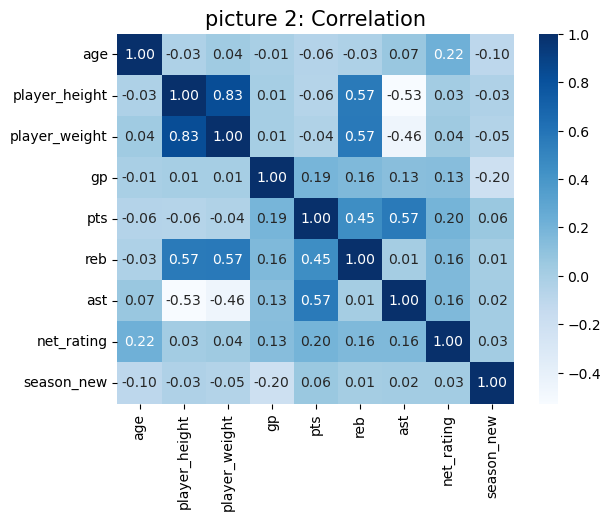

In [39]:
sns.heatmap(df3.corr(), cmap='Blues', annot=True, fmt='.2f');
plt.title('picture 2: Correlation',fontsize=15);

#### Conclusion

From all of the performance attributes, height has a strong correlation with rebound and assist performances.

### Analysis 3 - Top Performers Analysis

The objective of Analysis 3 is to get an idea of the top performer in NBA. In the previous analysis, it is found that height has a strong correlation with rebounds and assists per game. The main hypothesis is the findings should be in line with analysis 2 findings:
- Top rebounder will be taller
- Top Assist maker will be shorter

In addition, points and net rating performance will also be analyzed.

#### Analysis

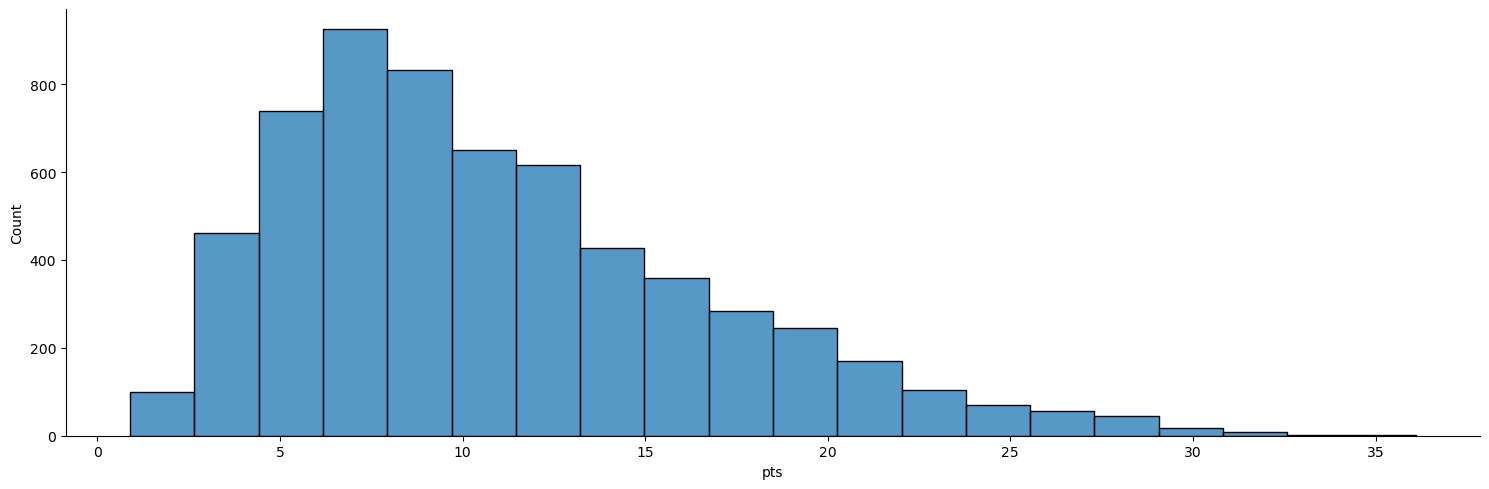

In [40]:
sns.displot(df3,x='pts',aspect=3,bins=20)

In [41]:
data=df3['pts'].quantile(0.97)
data

24.2

In [42]:
df3.head()

,player_name,season,age,player_height,player_weight,gp,pts,reb,ast,net_rating,season_new
3,Ed O'Bannon,1996-97,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,1996
6,Eddie Jones,1996-97,25.0,198.12,86.182480,80,17.2,4.1,3.4,4.1,1996
7,Elden Campbell,1996-97,28.0,213.36,113.398000,77,14.9,8.0,1.6,3.3,1996
8,Eldridge Recasner,1996-97,29.0,193.04,86.182480,71,5.7,1.6,1.3,-0.3,1996
9,Elliot Perry,1996-97,28.0,182.88,72.574720,82,6.9,1.5,3.0,-1.2,1996


In [43]:
df_net=df3.sort_values('net_rating',ascending=False)
df_net=df_net[['player_name','season','player_height','net_rating','age']].head(20)
df_net

,player_name,season,player_height,net_rating,age
8883,Draymond Green,2015-16,200.66,18.9,26.0
9536,JaVale McGee,2016-17,213.36,18.7,29.0
8739,Stephen Curry,2015-16,190.50,18.3,28.0
9182,Stephen Curry,2016-17,190.50,17.2,29.0
5209,Kevin Garnett,2007-08,210.82,17.0,32.0
8292,Stephen Curry,2014-15,190.50,17.0,27.0
3568,Tim Duncan,2004-05,210.82,16.7,29.0
3934,Manu Ginobili,2004-05,198.12,16.6,27.0
8524,Andrew Bogut,2014-15,213.36,16.6,30.0
8555,Draymond Green,2014-15,200.66,16.5,25.0


In [44]:
df_points=df3.sort_values('pts',ascending=False)
df_points=df_points[['player_name','season','player_height','pts','age']].head(20)
df_points

,player_name,season,player_height,pts,age
10572,James Harden,2018-19,195.58,36.1,29.0
4342,Kobe Bryant,2005-06,198.12,35.4,27.0
11041,James Harden,2019-20,195.58,34.3,30.0
4124,Allen Iverson,2005-06,182.88,33.0,31.0
2953,Tracy McGrady,2002-03,203.20,32.1,24.0
7928,Kevin Durant,2013-14,205.74,32.0,25.0
11335,Stephen Curry,2020-21,190.50,32.0,33.0
9143,Russell Westbrook,2016-17,190.50,31.6,28.0
4703,Kobe Bryant,2006-07,198.12,31.6,28.0
4323,LeBron James,2005-06,203.20,31.4,21.0


In [45]:
df_assists=df3.sort_values('ast',ascending=False)
df_assists=df_assists[['player_name','season','player_height','ast','age']].head(20)
df_assists

,player_name,season,player_height,ast,age
8787,Rajon Rondo,2015-16,185.42,11.7,30.0
11433,Russell Westbrook,2020-21,190.50,11.7,32.0
5049,Chris Paul,2007-08,182.88,11.6,23.0
4772,Steve Nash,2006-07,190.50,11.6,33.0
3577,Steve Nash,2004-05,190.50,11.5,31.0
6357,Steve Nash,2010-11,190.50,11.4,37.0
430,Mark Jackson,1996-97,190.50,11.4,32.0
6609,Rajon Rondo,2010-11,185.42,11.2,25.0
9465,James Harden,2016-17,195.58,11.2,27.0
5322,Steve Nash,2007-08,190.50,11.1,34.0


In [46]:
df_rebounds=df3.sort_values('reb',ascending=False)
df_rebounds=df_rebounds[['player_name','season','player_height','reb','age']].head(20)
df_rebounds

,player_name,season,player_height,reb,age
9825,Andre Drummond,2017-18,210.82,16.0,24.0
10203,Andre Drummond,2018-19,210.82,15.6,25.0
2741,Ben Wallace,2002-03,205.74,15.4,28.0
6462,Kevin Love,2010-11,208.28,15.2,22.0
9665,DeAndre Jordan,2017-18,210.82,15.2,29.0
8536,DeAndre Jordan,2014-15,210.82,15.0,26.0
728,Dennis Rodman,1997-98,198.12,15.0,37.0
8956,Andre Drummond,2015-16,210.82,14.8,22.0
12013,Rudy Gobert,2021-22,215.90,14.7,30.0
11469,Clint Capela,2020-21,208.28,14.3,27.0


In [47]:
df_new=pd.DataFrame({'Performance_Index':['Points','Assists','Rebounds','net_rating'],
                    'Average_Height':[df_points['player_height'].mean(),df_assists['player_height'].mean(),df_rebounds['player_height'].mean(),df_net['player_height'].mean()],
                    'Median_Height':[df_points['player_height'].median(),df_assists['player_height'].median(),df_rebounds['player_height'].median(),df_net['player_height'].median()]})
df_new

,Performance_Index,Average_Height,Median_Height
0,Points,194.437,194.31
1,Assists,188.722,190.50
2,Rebounds,210.439,210.82
3,net_rating,204.470,203.20


#### Conclusion

Strengthen the findings in the previous analysis, the top 20 best performers in assists and rebounds have a height of below 190 cm and above 210 cm respectively. In addition, the highest-scoring performance has a height of about 195 cm while the higehst-net-rating is 205 cm.

### Final Conclusions

##### 1. The Height Trend
The height trend is decreasing in the past 3 years (2019 - 2021) by 2 cm. Despite that fact, the author believes that the height trend will not decrease any further, because the minimum listed heights in the past 9 years are consistently in 175 cm. The difference is significant compared with the shortest NBA player in the 90s and 00s era, namely Muggsy Bogues (160 cm) and Earl Boykins (165 cm). It is shown that the minimum height requirement becomes higher.
##### 2. Correlation of Height with Performance
Height has a strong correlation with rebound and assist. Most likely, this happened because of players' position during the game. Shorter players tend to be point-guard (PG) who supply the ball. On the other hand, Center (C) is the tallest player on each team and plays near the basket, allowing them to get the rebounds [5].
##### 3. Top Performer Analysis
The findings in analysis 3 strengthen the 2nd finding, the top 20 rebounders have an average height of 210 cm while the top 20 assist makers are 188 cm. Additionally, the average height of the top 20 in points is 194, higher than the assist maker but still lower than the general average, while the top 20 net rating height is 204 cm.

### Limitation and Further Study

##### Limitation
This study only considers the height factor and its correlation with major performance attributes. The author believes that other instruments might also be a significant variable to determine the performance of a certain player, i.e. Standing Reach, Wingspan, Standing Vertical Leap, Max Vertical Leap, Shuttle Run, Lane Agility, Three Quarter Sprint, NBA Break Left Shooting percentage, NBA Break Right Shooting percentage, NBA Corner Left Shooting percentage, NBA Corner Right Shooting percentage [6].
##### Further Study
The author suggests considering other factors than height itself and analyzing its correlation with performance attributes. Furthermore, by using machine learning, the performance expectation of prospective players might be predicted based on physical factors.

### References
[1] https://beyond-the-match.com/en/insights/success-all-around-the-world-the-globalisation-of-the-nba/ 

[2] https://www.thehoopsgeek.com/average-nba-height/

[3] https://www.nba.com/news/3-point-era-nba-75

[4] https://www.usab.com/youth/news/2010/09/3ways-to-make-more-3-point-shots.aspx

[5] https://jr.nba.com/basketball-positions/#:~:text=Players%20in%20a%20basketball%20game,point%20guard%2C%20and%20shooting%20guard.&text=The%20center%20is%20the%20tallest,team%2C%20playing%20near%20the%20basket.

[6] https://www.scielo.br/j/rbcdh/a/Dtb3nwNWDVhVRtJ3Zv4RKtc/?lang=en#:~:text=Thus%2C%20the%20NBA%20Draft%20Combine,Shooting%20percentage%2C%20NBA%20Break%20Right